# Numerical Computing in Python

(C) 2016 [Steve Phelps](http://sphelps.net)



# Overview

- Floating-point representation
- Arrays and Matrices with `numpy`
- Basic plotting with `matplotlib`
- Pseudo-random variates with `numpy.random`

# Representing continuous values

- Digital computers are inherently *discrete*.

- Real numbers $x \in R$ cannot always be represented exactly in a digital computer.

- They are stored in a format called *floating-point*.

- [IEEE Standard 754](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) specifies a universal format across different implementations.  
    - As always there are deviations from the standard.
    
- There are two standard sizes of floating-point numbers: 32-bit and 64-bit.

- 64-bit numbers are called *double precision*, are sometimes called *double* values.

- IEEE floating-point calculations are performed in *hardware* on modern computers. 

- How can we represent aribitrary real values using only 32 bits?
   

# Fixed-point verses floating-point

- One way we could discretise continuous values is to represent them as two integers $x$ and $y$.

- The final value is obtained by e.g. $r = x + y \times 10^{-5}$. 

- So the number $500.4421$ would be represented as the tuple $x = 500$, $y = 44210$.

- The exponent $5$ is fixed for all computations.

- This number represents the *precision* with which we can represent real values.

- It corresponds to the where we place we place the decimal *point*.

- This scheme is called fixed precision.

- It is useful in certain circumstances, but suffers from many problems.

- In practice, we use variable precision, also known as *floating* point.

# Scientific Notation

- Humans also use a form of floating-point representation.

- In [Scientific notation](https://en.wikipedia.org/wiki/Scientific_notation), all numbers are written
in the form $m \times 10^n$.

- When represented in ASCII, we abbreviate this `<m>e<n>`, for example `6.72e+11` = $6.72 \times 10^{11}$.

- The integer $m$ is called the *significand* or *mantissa*. 

- The integer $n$ is called the *exponent*.

- The integer $10$ is the *base*.


# Floating-point representation

- Floating point numbers use a base of $2$ instead of $10$.

- Additionally, the mantissa are exponent are stored in binary.

- The mantissa uses [two's complement](https://en.wikipedia.org/wiki/Two's_complement) to represent positive and negative numbers.
    - One bit is reserved as the sign-bit: 1 for negative, 0 for positive values.
    
- The mantissa is normalised, so we assume that it starts with the digit $1$ (which is not stored).




# Bias


- We also need to represent signed *exponents*.  

- The exponent does *not* use two's complement.

- Instead a *bias* value is subtracted from the stored value to obtain the final stored exponent.

- Double-precision values use a bias of $1023$, and single-precision uses a bias value of $127$.

- For example, in double-precision the exponent $1022$ would be encoded as $1$.

- The stored exponent values $0$ and $1024$ are reserved for special values- discussed later.  


# Double and single precision formats

The number of bits allocated to represent each integer component of a float is given below:



| **Format**   | **Sign** |   **Exponent** | **Mantissa** |  **Total** |
| ------------ | -------- | -------------- | ------------ | ---------- |
| **single**   | 1      | 8        | 23        | 32
| **double**   | 1      | 11       | 52        | 64 

- Python normally works 64-bit precision.

- `numpy` allows us to [specify the type](http://docs.scipy.org/doc/numpy/user/basics.types.html) when storing data in arrays.

- This is particularly useful for big data where we may need to be careful about the storage requirements of our data-set.


# Loss of precision

- We cannot represent every value in floating-point.

- Consider single-precision (32-bit).

- Let's try to represent $4,039,944,879$.

- As a binary integer we write this:

`11110000 11001100 10101010 10101111`

- This already takes up 32-bits.

- The mantissa only allows us to store 24-bit integers.

- So we have to *round*.  We store it as:

`+1.1110000 11001100 10101011e+31`

- Which gives us 

`+11110000 11001100 10101011 0000000`

$= 4,039,944,960$



# Ranges of floating-point values

In single precision arithmetic, we *cannot* represent the following values:

- Negative numbers less than $-(2-2^{-23}) \times 2^{127}$

- Negative numbers greater than $-2^{-149}$

- Positive numbers less than $2^{-149}$

- Positive numbers greater than $(2-2^{-23}) \times 2^{127}$

Attempting to represent these numbers results in *overflow* or *underflow*. 

# Effective floating-point range

| Format | Binary | Decimal |
| ------ | ------ | ------- |
| single | $\pm (2-2^{-23}) \times 2^{127}$ | $\approx \pm 10^{38.53}$ |
| double | $\pm (2-2^{-52}) \times 2^{1023}$ | $\approx \pm 10^{308.25}$ |

    

# 

# Importing numpy


- Functions for numerical computiing are provided by a separate _module_ called [`numpy`](http://www.numpy.org/).  

- Before we use the numpy module we must import it.

- By convention, we import `numpy` using the alias `np`.

- Once we have done this we can prefix the functions in the numpy library using the prefix `np.`

In [1]:
import numpy as np

- We can now use the functions defined in this package by prefixing them with `np`.  


# Arrays

- Arrays represent a collection of values.

- In contrast to lists:
    - arrays typically have a *fixed length*
        - they can be resized, but this involves an expensive copying process.
    - and all values in the array are of the *same type*.
        - typically we store floating-point values.

- Like lists:
    - arrays are *mutable*;
    - we can change the elements of an existing array.


# Arrays in `numpy`

    
- Arrays are provided by the `numpy` module.

- The function `array()` creates an array given a list.

In [2]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
x

array([0, 1, 2, 3, 4])

# Array indexing

- We can index an array just like a list

In [3]:
x[4]

4

In [4]:
x[4] = 2
x

array([0, 1, 2, 3, 2])

# Arrays are not lists

- Although this looks a bit like a list of numbers, it is a fundamentally different type of value:

In [5]:
type(x)

numpy.ndarray

- For example, we cannot append to the array:

In [6]:
x.append(5)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

# Functions over arrays

- When we use arithmetic operators on arrays, we create a new array with the result of applying the operator to each element.

In [7]:
y = x * 2
y

array([0, 2, 4, 6, 4])

- The same goes for numerical functions:

In [8]:
x = np.array([-1, 2, 3, -4])
y = abs(x)
y

array([1, 2, 3, 4])

# Vectorized functions

- Note that not every function automatically works with arrays.

- Functions that have been written to work with arrays of numbers are called *vectorized* functions.

- Most of the functions in `numpy` are already vectorized.

- You can create a vectorized version of any other function using the higher-order function `numpy.vectorize()`.

# `vectorize` example

In [9]:
def myfunc(x):
    if x >= 0.5:
        return x
    else:
        return 0.0
    
fv = np.vectorize(myfunc)

In [10]:
x = np.arange(0, 1, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [11]:
myfunc(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
fv(x)

array([0. , 0. , 0. , 0. , 0. , 0.5, 0.6, 0.7, 0.8, 0.9])

# Populating Arrays

- To populate an array with a range of values we use the `np.arange()` function:


In [13]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- We can also use floating point increments.


In [14]:
x = np.arange(0, 1, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Basic Plotting

- We will use a module called `matplotlib` to plot some simple graphs.

- This module has a nested module called `pyplot`.

- By convention we import this with the alias `plt`.

- This module provides functions which are very similar to [MATLAB plotting commands](http://uk.mathworks.com/help/matlab/ref/plot.html).


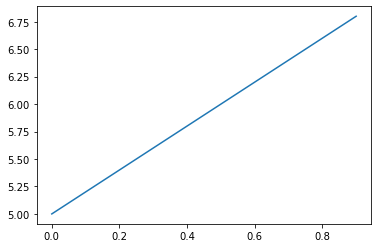

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

y = x*2 + 5
plt.plot(x, y)


# Plotting a sine curve

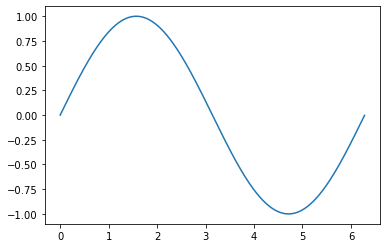

In [16]:
from numpy import pi, sin

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
plt.plot(x, y)

# Multi-dimensional data

- Numpy arrays can hold multi-dimensional data.

- To create a multi-dimensional array, we can pass a list of lists to the `array()` function:

In [17]:
import numpy as np

x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

# Arrays containing arrays

- A multi-dimensional array is an array of an arrays.

- The outer array holds the rows.

- Each row is itself an array:

In [18]:
x[0]

array([1, 2])

In [19]:
x[1]

array([3, 4])

- So the element in the second row, and first column is:

In [20]:
x[1][0]

3

# Matrices

- We can create a matrix from a multi-dimensional array.

In [21]:
M = np.matrix(x)
M

matrix([[1, 2],
        [3, 4]])

# Plotting multi-dimensional with matrices

- If we supply a matrix to `plot()` then it will plot the y-values taken from the *columns* of the matrix (notice the transpose in the example below).

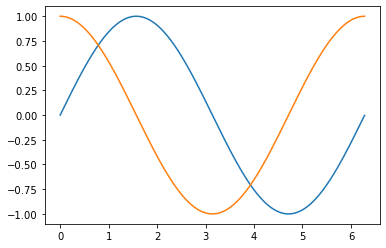

In [22]:
from numpy import pi, sin, cos

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
ax = plt.plot(x, np.matrix([sin(x), cos(x)]).T)

# Performance 

- When we use `numpy` matrices in Python the corresponding functions are linked with libraries written in C and FORTRAN.

- For example, see the [BLAS (Basic Linear Algebra Subprograms) library](http://www.netlib.org/blas/).

- These libraries are very fast, and can be configured so that operations are performed in parallel on multiple CPU cores, or GPU hardware.


# Matrix Operators

- Once we have a matrix, we can perform matrix computations.

- To compute the [transpose](http://mathworld.wolfram.com/MatrixTranspose.html) and [inverse](http://mathworld.wolfram.com/MatrixInverse.html) use the `T` and `I` attributes:

To compute the transpose $M^{T}$

In [23]:
M.T


matrix([[1, 3],
        [2, 4]])

To compute the inverse $M^{-1}$

In [24]:
M.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

# Matrix Dimensions

- The total number of elements, and the dimensions of the array:

In [25]:
M.size

4

In [26]:
M.shape

(2, 2)

In [27]:
len(M.shape)

2

# Creating Matrices from strings

- We can also create arrays directly from strings, which saves some typing:

In [28]:
I2 = np.matrix('2 0; 0 2')
I2

matrix([[2, 0],
        [0, 2]])

- The semicolon starts a new row.

# Matrix Multiplication

Now that we have two matrices, we can perform [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication):

In [29]:
M * I2

matrix([[2, 4],
        [6, 8]])

# Matrix Indexing


- We can [index and slice matrices](http://docs.scipy.org/doc/numpy/user/basics.indexing.html) using the same syntax as lists.

In [30]:
M

matrix([[1, 2],
        [3, 4]])

In [31]:
M[:,1]

matrix([[2],
        [4]])

# Slices are references

- If we use this is an assignment, we create a *reference* to the sliced elements, *not* a copy.

In [32]:
V = M[:,1]  # This does not make a copy of the elements!
V

matrix([[2],
        [4]])

In [33]:
M[0,1] = -2
V

matrix([[-2],
        [ 4]])

# Copying matrices and vectors

- To copy a matrix, or a slice of its elements, use the function `np.copy()`:



In [34]:
M = np.matrix('1 2; 3 4')
V = np.copy(M[:,1])  # This does copy the elements.
V

array([[2],
       [4]])

In [35]:
M[0,1] = -2
V

array([[2],
       [4]])

# Sums

One way we _could_ sum a vector or matrix is to use a `for` loop.

In [36]:
vector = np.arange(0.0, 100.0, 10.0)
vector


array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [37]:
result = 0.0
for x in vector:
    result = result + x
result

450.0

- This is not the most _efficient_ way to compute a sum.

# Efficient sums

- Instead of using a `for` loop, we can use a numpy function `sum()`.

- This function is written in the C language, and is very fast.


In [38]:
vector = np.array([0, 1, 2, 3, 4])
print(np.sum(vector))

10


# Summing rows and columns

- When dealing with multi-dimensional data, the 'sum()' function has a named-argument `axis` which allows us to specify whether to sum along, each rows or columns.


In [39]:
matrix = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


- To sum along rows:

In [40]:
np.sum(matrix, axis=0)

matrix([[12, 15, 18]])

- To sum along columns:

In [41]:
np.sum(matrix, axis=1)

matrix([[ 6],
        [15],
        [24]])

# Cumulative sums

- Suppose we want to compute $y_n = \sum_{i=1}^{n} x_i$ where $\mathbf{x}$ is a vector.


In [42]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
y = np.cumsum(x)
print(y)

[ 0  1  3  6 10]


# Cumulative sums along rows and columns


In [43]:
x = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [44]:
y = np.cumsum(x)
np.cumsum(x, axis=0)

matrix([[ 1,  2,  3],
        [ 5,  7,  9],
        [12, 15, 18]], dtype=int32)

In [45]:
np.cumsum(x, axis=1)

matrix([[ 1,  3,  6],
        [ 4,  9, 15],
        [ 7, 15, 24]], dtype=int32)

# Cumulative products

- Similarly we can compute $y_n = \Pi_{i=1}^{n} x_i$ using `cumprod()`:


In [46]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
np.cumprod(x)

array([  1,   2,   6,  24, 120], dtype=int32)

- We can compute cummulative products along rows and columns using the `axis` parameter, just as with the `cumsum()` example.

### Acknowledgements

The earlier sections of this notebook were adapted from [an article on floating-point numbers](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) written by [Steve Hollasch](http://steve.hollasch.net/).